PCOD ANALYSIS

Importing libraries:

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

Importing Metrics


In [26]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

Importing the dataset:

In [27]:
df = pd.read_csv("PCOS_data.csv")
print(df.head())

   Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
0       1                 1           0          28         44.6        152.0   
1       2                 2           0          36         65.0        161.5   
2       3                 3           1          33         68.8        165.0   
3       4                 4           0          37         65.0        148.0   
4       5                 5           0          25         52.0        161.0   

    BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
0  19.3           15                78                22  ...   
1  24.9           15                74                20  ...   
2  25.3           11                72                18  ...   
3  29.7           13                72                20  ...   
4  20.1           11                72                18  ...   

   Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0              1.0                  0                  110  

Perform Exploratory Data Analysis:

In [28]:
df.shape

(541, 45)

In [29]:
df.isnull().values.any()

True

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [31]:
df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


Model Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93        80
           1       0.81      0.75      0.78        28

    accuracy                           0.89       108
   macro avg       0.86      0.84      0.85       108
weighted avg       0.89      0.89      0.89       108



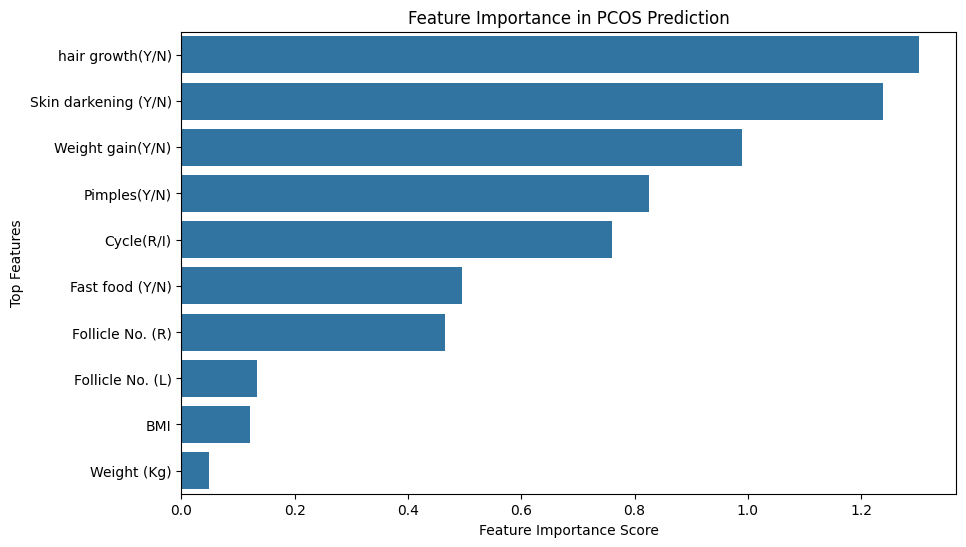

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

df = df.drop(columns=["Sl. No", "Patient File No.", "Unnamed: 44"], errors='ignore')
df.columns = df.columns.str.strip()
df = df.dropna()
df = pd.get_dummies(df, drop_first=True)
target_column = "PCOS (Y/N)"
correlation = df.corr()[target_column].abs().sort_values(ascending=False)
top_features = correlation.index[1:11]
X = df[top_features]
y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
feature_importance = pd.Series(np.abs(model.coef_[0]), index=top_features).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Top Features")
plt.title("Feature Importance in PCOS Prediction")
plt.show()

In [34]:
print("Top 10 Features Used for PCOS Prediction:", top_features.tolist())

Top 10 Features Used for PCOS Prediction: ['Follicle No. (R)', 'Follicle No. (L)', 'Skin darkening (Y/N)', 'hair growth(Y/N)', 'Weight gain(Y/N)', 'Cycle(R/I)', 'Fast food (Y/N)', 'Pimples(Y/N)', 'Weight (Kg)', 'BMI']


In [35]:
def predict_pcos():
    print("Enter values for the following features:")
    input_values = []
    for feature in top_features:
        value = float(input(f"{feature}: "))
        input_values.append(value)
    prediction = model.predict([input_values])[0]
    result = "PCOS Detected" if prediction == 1 else "No PCOS Detected"
    print("Prediction Result:", result)

if __name__ == "__main__":
    predict_pcos()

Enter values for the following features:
Follicle No. (R): 3
Follicle No. (L): 3
Skin darkening (Y/N): 0
hair growth(Y/N): 0
Weight gain(Y/N): 0
Cycle(R/I): 2
Fast food (Y/N): 0
Pimples(Y/N): 0
Weight (Kg): 56
BMI: 22
Prediction Result: No PCOS Detected


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
